# Python routines for the Request Engineering and Standard Integration (RESI) report

## imports and create_date function

In [28]:
#############################################
#                                           #
# Author: Fabrizio Finozzi                  #
# Email: fabrizio.finozzi@gmail.com         #
#                                           #
#                                           #
#############################################

######################################################################
#                                                                    #
# IMPORTANT                                                          #
#                                                                    #
# This software is distributed without any warranty.                 # 
#                                                                    #
# Neither the author nor Riverland Reply GmbH nor the Reply Group    #
# are liable for any damage caused directly or indirectly by the use #
# or misuse of this software.                                        #
#                                                                    # 
######################################################################

In [28]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.font_manager as font_manager
import matplotlib.dates
import pandas as pd
from matplotlib.dates import YEARLY, WEEKLY,MONTHLY,DAILY, DateFormatter, rrulewrapper, RRuleLocator , WeekdayLocator
import numpy as np
import os

# This function takes the date in format DD-MM-YYYY and trasforms them into float numbers with the date2num method
def create_date(datetxt):
    """Creates the date"""
    day,month,year=datetxt.split('-')
    date = dt.datetime(int(year), int(month), int(day))
    mdate = matplotlib.dates.date2num(date)
    return mdate

## Gannt chart

In [64]:
def CreateGanttChart(gname):
    
    # variable definition
    
    taskNames = []
    taskStartDates = []
    taskEndDates = []
    testStartDates = []
    testEndDates = []
    taskColors = []
    font = font_manager.FontProperties(size='medium')
    
    # open input file    
    try:
        textlist=open(gname).readlines()
    except:
        return

    for tx in textlist:
        if not tx.startswith('#'):
            name,taskcolor,startdate,UATstart,UATend,enddate=tx.split(',')
            taskNames.append(name.replace('\n',''))
            taskStartDates.append(create_date(startdate.replace('\n','')))
            taskEndDates.append(create_date(enddate.replace('\n','')))
            testStartDates.append(create_date(UATstart.replace('\n','')))
            testEndDates.append(create_date(UATend.replace('\n','')))
            taskColors.append(taskcolor)

    
    # create a matplotlib figure
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)
    ax.set_title('Gannt chart')
    
    labelPos = np.arange(0.5,len(taskNames)*0.5+0.5,0.5)
    locsy, labelsy = plt.yticks(labelPos,taskNames)
    plt.setp(labelsy, fontsize = 8)
    ax.set_ylim(ymin = -0.1, ymax = len(taskNames)*0.5+0.5)
    
    ax.xaxis_date()
    loc = WeekdayLocator(byweekday=0,interval=1)
    formatter = DateFormatter("%d-%b '%y")    
  
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(formatter)
    labelsx = ax.get_xticklabels()
    plt.setp(labelsx, rotation=30, fontsize=10)
    
    ax.grid(color = 'g', linestyle = ':')
    ax.invert_yaxis()
            
    for i,name in enumerate(taskNames):
        start_date,end_date = taskStartDates[i],taskEndDates[i]      
        uat_start,uat_end = testStartDates[i],testEndDates[i]  
        barcolor = taskColors[i]
        if i == len(taskNames)-1:
            ax.barh((i*0.5)+0.5, end_date - start_date, left=start_date, height=0.3, align='center', color=barcolor, alpha = 0.8)
            ax.barh((i*0.5)+0.5, uat_end - uat_start, left=uat_start, height=0.3, align='center', edgecolor='lightblue', color='blue', alpha = 0.8,label='UAT test')
        else:        
            ax.barh((i*0.5)+0.5, end_date - start_date, left=start_date, height=0.3, align='center', color=barcolor, alpha = 0.8)
            ax.barh((i*0.5)+0.5, uat_end - uat_start, left=uat_start, height=0.3, align='center', edgecolor='lightblue', color='blue', alpha = 0.8)
    
    
    ax.legend(loc=1,prop=font)
    fig.autofmt_xdate()
    now = str(dt.datetime.now())
    plt.savefig('gantt_'+str(now[:10])+'.png')
    plt.show()

## main function

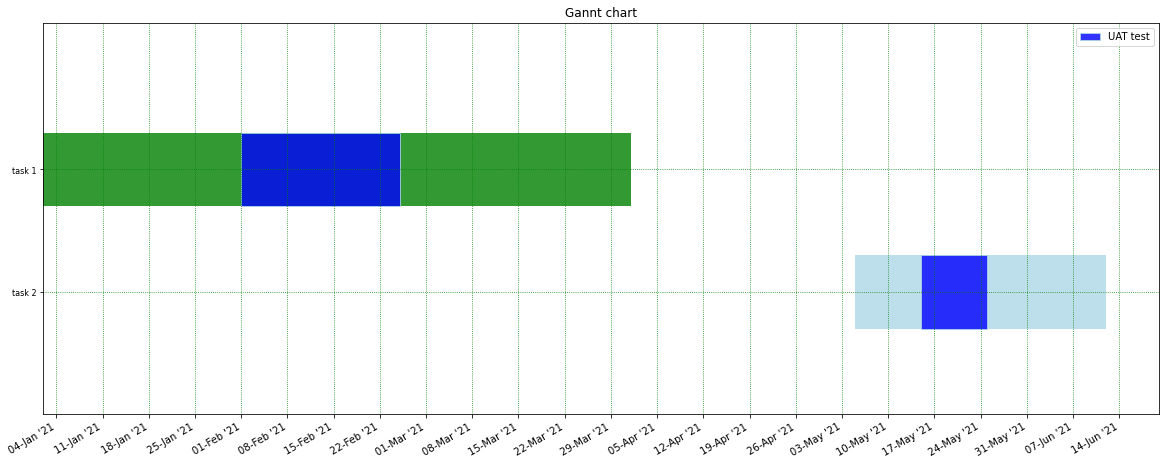

In [65]:
import os 
if __name__ == '__main__':
    gname="projectChart.txt"
    CreateGanttChart(gname)